In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sinal(z):
    return 1 if z > 0.5 else 0

In [66]:
def calcular_erro(alpha, X, Y, A):
    erro = 0
    N = len(X)
    for n in range(N):
        p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        if(1 - p_chapeu)<np.e**-12:
            erro -= np.e**-12
        else:
            erro -= (Y[n] * np.log(p_chapeu) + (1 - Y[n]) * np.log(1 - p_chapeu))
    erro = erro/N
    return erro if erro > np.e**-12 else np.e**-12

In [5]:
def batche(lista, n):
    # Seleciona aleatoriamente n índices únicos da lista
    indices_aleatorios = random.sample(range(len(lista)), n)
    return indices_aleatorios

In [77]:
def CLogDKPd(X, Y, alpha, eta,epochs,d,batch_size):
    t=0
    E=[]
    N=len(X)
    A=np.dot(X,X.T)
    A=A**d
    
    for epoca in range(epochs):
        S=[]
        ordem =batche(X, batch_size)
        for i in ordem:
            p_chapeu=sigmoid(sum(alpha * (A[i])))
            S.append((p_chapeu-Y[i]) *(A[i]))
        S=np.array(np.sum(S,axis=0))
        alpha = alpha - eta * S
        E.append(calcular_erro(alpha, X, Y, A))
        print(alpha)
    return alpha, E

In [85]:
data = pd.read_csv('Ex2_D.csv', header=None)
X = np.array(data.iloc[:, :-1].values)
Y = np.array(data.iloc[:, -1].values)
eta = 0.1
epochs = 500
alpha = np.zeros(len(X))
d=2
batch_size = 4
alpha, E = CLogDKPd(X, Y, alpha, eta, epochs, d, batch_size)



[0.  0.  0.  0.1]
[-0.0433304  -0.13622155 -0.13622155 -0.0713026 ]
[0.04832342 0.13183473 0.13183473 0.5441675 ]
[-0.11102686 -0.3108916  -0.3108916  -0.1814406 ]
[0.04215876 0.11284293 0.11284293 0.70997728]
[-0.12426763 -0.34412387 -0.34412387 -0.0373995 ]
[0.0179659  0.0505804  0.0505804  0.80204596]
[-0.14753135 -0.40579857 -0.40579857  0.05488131]
[-0.00632306 -0.01737417 -0.01737417  0.88009097]
[-0.16981555 -0.47130363 -0.47130363  0.13580848]
[-0.02756185 -0.08392299 -0.08392299  0.9559318 ]
[-0.18906442 -0.53540394 -0.53540394  0.21454625]
[-0.04605277 -0.14980743 -0.14980743  1.02812607]
[-0.20545252 -0.59861387 -0.59861387  0.28997945]
[-0.06166694 -0.21469854 -0.21469854  1.0971528 ]
[-0.21890064 -0.66067985 -0.66067985  0.36248488]
[-0.07441276 -0.27854885 -0.27854885  1.16305021]
[-0.22942204 -0.72155306 -0.72155306  0.43210796]
[-0.08429324 -0.34125441 -0.34125441  1.22600613]
[-0.23703776 -0.78115152 -0.78115152  0.49901027]
[-0.09134691 -0.40276483 -0.40276483  1.2861

In [86]:
A=np.dot(X,X.T)
A=A**d
for n in range(len(X)):
    p_chapeu = sigmoid(sum(alpha * (A[n]) ))
    print(p_chapeu)
    print(sinal(p_chapeu))
    


0.7516547290539017
1
0.13557086619231767
0
0.13557086619231767
0
0.9035139554165007
1


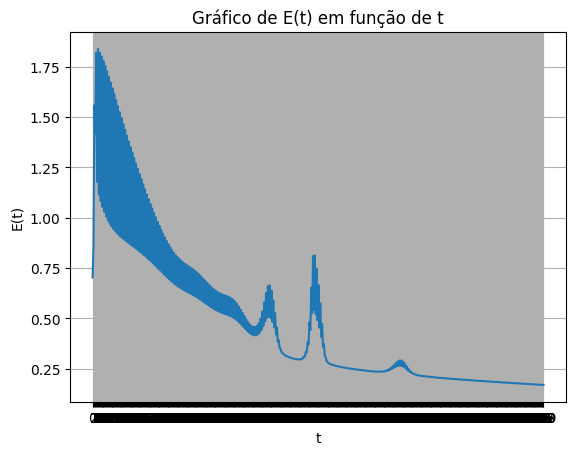

In [87]:
t = list(range(len(E)))

# Plotando o gráfico
plt.plot(t, E, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()